## **First we upload data generated from the nba_twitter notebook.**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving nba_predict.csv to nba_predict (2).csv


In [73]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
nba = pd.read_csv('nba_predict.csv')
nba.head()

,date,name of team1,counts of team1,name of team2,counts of team2,positive percentage of team 1,negative percentage of team1,neutral percentage of team 1,positive percentage of team 2,negative percentage of team 2,...,Result team 2,percentageofcounts_1,percentageofcounts_2,positive_1,negative_1,neutral_1,positive_2,negative_2,neutral_2,result
0,1126,Timberwolves,53,Cavaliers,62,41.509434%,3.773585%,54.716981%,29.032258%,24.193548%,...,95,0.460870,-0.539130,0.415094,-0.037736,0.547170,-0.290323,0.241935,0.467742,1
1,1126,Bucks,329,Hornets,116,9.422492%,3.647416%,86.930091%,20.689655%,7.758621%,...,110,0.739326,-0.260674,0.094225,-0.036474,0.869301,-0.206897,0.077586,0.715517,0
2,1126,Rockets,216,Wizards,223,32.407407%,12.037037%,55.555556%,40.358744%,7.623318%,...,135,0.492027,-0.507973,0.324074,-0.120370,0.555556,-0.403587,0.076233,0.520179,0
3,1126,Spurs,105,Bulls,110,42.857143%,10.476190%,46.666667%,22.727273%,13.636364%,...,107,0.488372,-0.511628,0.428571,-0.104762,0.466667,-0.227273,0.136364,0.636364,1
4,1126,Celtics,178,Pelicans,104,32.584270%,29.775281%,37.640449%,36.538462%,20.192308%,...,107,0.631206,-0.368794,0.325843,-0.297753,0.376404,-0.365385,0.201923,0.432692,1


## **Data** **cleaning**

In [0]:
nba_cleaned=nba[['percentageofcounts_1','percentageofcounts_2','positive_1','negative_1','positive_2','negative_2','result']]

In [75]:
nba_cleaned.head()

,percentageofcounts_1,percentageofcounts_2,positive_1,negative_1,positive_2,negative_2,result
0,0.460870,-0.539130,0.415094,-0.037736,-0.290323,0.241935,1
1,0.739326,-0.260674,0.094225,-0.036474,-0.206897,0.077586,0
2,0.492027,-0.507973,0.324074,-0.120370,-0.403587,0.076233,0
3,0.488372,-0.511628,0.428571,-0.104762,-0.227273,0.136364,1
4,0.631206,-0.368794,0.325843,-0.297753,-0.365385,0.201923,1


note: percentage of count means counts of tweets of that team divided by counts of both two teams

## **Plots for each independent variable**

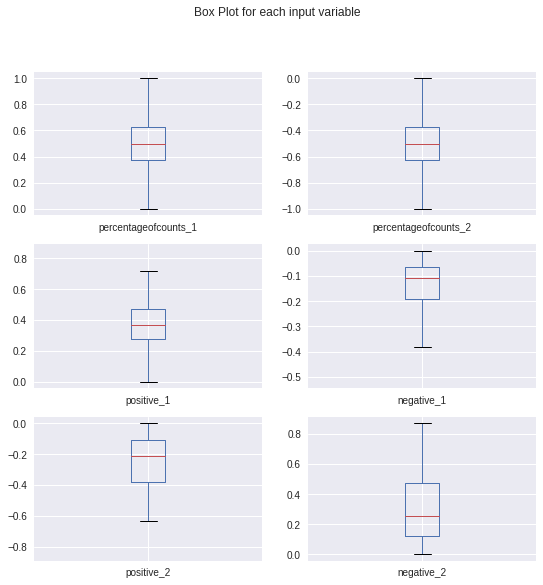

In [76]:
nba_cleaned.drop('result', axis=1).plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('nba_box')
plt.show()

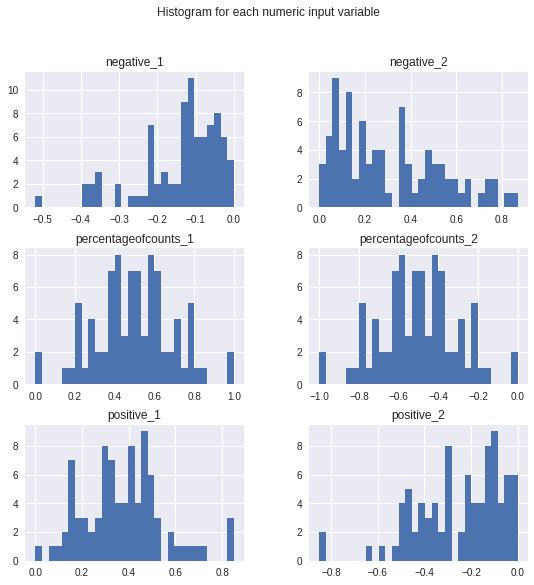

In [77]:
import pylab as pl
nba_cleaned.drop('result' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('nba_hist')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  import sys


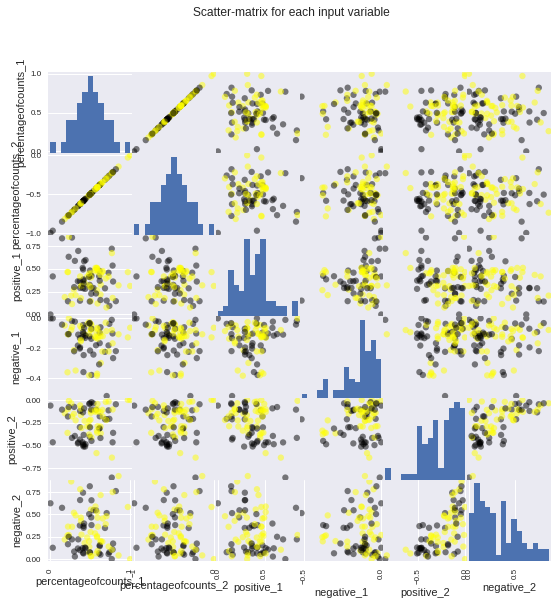

In [78]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['percentageofcounts_1','percentageofcounts_2','positive_1','negative_1','positive_2','negative_2']
X = nba_cleaned[feature_names]
y = nba_cleaned['result']
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('nba_scatter_matrix')

## **Classification models**

In [0]:
X = np.abs(dataset.iloc[:, 1:6].values)
y = dataset.iloc[:, 6].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.53
Accuracy of Logistic regression classifier on test set: 0.64


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
from sklearn.linear_model import LinearRegression
from scipy import stats
X = np.abs(dataset.iloc[:, 1:6].values)
y = dataset.iloc[:, 6].values
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilites
0        0.9203            0.257     3.579         0.001
1       -0.4582            0.283    -1.619         0.109
2        0.0224            0.327     0.068         0.946
3       -0.2699            0.526    -0.513         0.609
4       -0.5939            0.374    -1.588         0.116
5       -0.0452            0.303    -0.149         0.882


In [88]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.68


In [89]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.62
Accuracy of SVM classifier on test set: 0.68


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## **Neural Network**

In [0]:
# Importing the libraries
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
# Importing the dataset
    dataset = nba_cleaned

In [0]:
X = np.abs(dataset.iloc[:, 1:6].values)
y = dataset.iloc[:, 6].values

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [196]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, :]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [0]:
#Initializing Neural Network
classifier = Sequential()

In [0]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=5, units=5, kernel_initializer="uniform"))
# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=3, kernel_initializer="uniform"))
# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [0]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [288]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 50, nb_epoch = 600)

Epoch 1/600
68/68 [==============================] - 0s 140us/step - loss: 0.4585 - acc: 0.7500
Epoch 2/600
68/68 [==============================] - 0s 136us/step - loss: 0.4586 - acc: 0.7500
Epoch 3/600
68/68 [==============================] - 0s 93us/step - loss: 0.4585 - acc: 0.7500
Epoch 4/600
68/68 [==============================] - 0s 118us/step - loss: 0.4586 - acc: 0.7500
Epoch 5/600
68/68 [==============================] - 0s 119us/step - loss: 0.4586 - acc: 0.7500
Epoch 6/600
68/68 [==============================] - 0s 103us/step - loss: 0.4585 - acc: 0.7500
Epoch 7/600
68/68 [==============================] - 0s 86us/step - loss: 0.4584 - acc: 0.7500
Epoch 8/600
68/68 [==============================] - 0s 123us/step - loss: 0.4584 - acc: 0.7500
Epoch 9/600
68/68 [==============================] - 0s 103us/step - loss: 0.4584 - acc: 0.7500
Epoch 10/600
68/68 [==============================] - 0s 95us/step - loss: 0.4585 - acc: 0.7500
Epoch 11/600
68/68 [======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


68/68 [==============================] - 0s 108us/step - loss: 0.4584 - acc: 0.7353
Epoch 20/600
68/68 [==============================] - 0s 125us/step - loss: 0.4582 - acc: 0.7500
Epoch 21/600
68/68 [==============================] - 0s 133us/step - loss: 0.4581 - acc: 0.7500
Epoch 22/600
68/68 [==============================] - 0s 97us/step - loss: 0.4580 - acc: 0.7500
Epoch 23/600
68/68 [==============================] - 0s 111us/step - loss: 0.4579 - acc: 0.7500
Epoch 24/600
68/68 [==============================] - 0s 112us/step - loss: 0.4580 - acc: 0.7500
Epoch 25/600
68/68 [==============================] - 0s 102us/step - loss: 0.4581 - acc: 0.7500
Epoch 26/600
68/68 [==============================] - 0s 103us/step - loss: 0.4580 - acc: 0.7500
Epoch 27/600
68/68 [==============================] - 0s 89us/step - loss: 0.4579 - acc: 0.7500
Epoch 28/600
68/68 [==============================] - 0s 95us/step - loss: 0.4579 - acc: 0.7500
Epoch 29/600
68/68 [==========================

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [291]:
cm

array([[6, 3],
       [5, 4]])

## Plots of Loss and Accuracy

In [259]:
history=classifier.fit(X_train[:20,:],y_train[:20],epochs=600,batch_size=50,validation_data=(X_train[20:,:],y_train[20:]))

Train on 20 samples, validate on 48 samples
Epoch 1/600
20/20 [==============================] - 0s 20ms/step - loss: 0.6004 - acc: 0.7000 - val_loss: 0.5880 - val_acc: 0.7083
Epoch 2/600
20/20 [==============================] - 0s 239us/step - loss: 0.6001 - acc: 0.7000 - val_loss: 0.5881 - val_acc: 0.7083
Epoch 3/600
20/20 [==============================] - 0s 147us/step - loss: 0.5996 - acc: 0.7000 - val_loss: 0.5883 - val_acc: 0.7083
Epoch 4/600
20/20 [==============================] - 0s 139us/step - loss: 0.5991 - acc: 0.7000 - val_loss: 0.5886 - val_acc: 0.7083
Epoch 5/600
20/20 [==============================] - 0s 145us/step - loss: 0.5985 - acc: 0.7000 - val_loss: 0.5889 - val_acc: 0.7083
Epoch 6/600
20/20 [==============================] - 0s 162us/step - loss: 0.5979 - acc: 0.7000 - val_loss: 0.5893 - val_acc: 0.7083
Epoch 7/600
20/20 [==============================] - 0s 171us/step - loss: 0.5971 - acc: 0.7000 - val_loss: 0.5897 - val_acc: 0.7083
Epoch 8/600
20/20 [=======

In [0]:
history_dict=history.history
loss_values=history_dict['loss']
test_loss_values=history_dict['val_loss']

In [0]:
epochs=range(1,len(loss_values)+1)

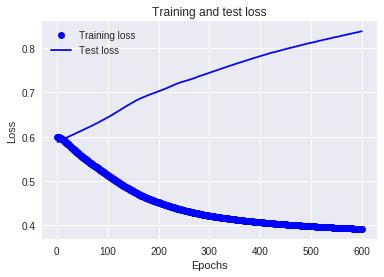

In [262]:
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,test_loss_values,'b',label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']

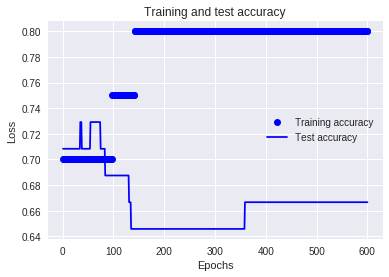

In [264]:
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Reference:
Pushkar Mandot https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d
Susan Li https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2